<a href="https://colab.research.google.com/github/karlychann/neuro140/blob/main/uvfp_testmlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final models trained on the entire dataset, with and without biased features

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from io import BytesIO
import pickle
import requests
pd.set_option('display.max_columns', None)

In [ ]:
all_features = ['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']


# from classification_wo_correlated_features.ipynb features that correlate least with biased features
uncorrelated_features = ['mfcc4V_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'mfcc1_sma3_amean',
       'F3bandwidth_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F1frequency_sma3nz_stddevNorm', 'jitterLocal_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
       'alphaRatioV_sma3nz_stddevNorm', 'mfcc1_sma3_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'mfcc4_sma3_amean',
       'F3frequency_sma3nz_amean', 'mfcc2_sma3_amean',
       'VoicedSegmentsPerSec', 'F1bandwidth_sma3nz_amean',
       'mfcc2V_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm',
       'hammarbergIndexV_sma3nz_stddevNorm',
       'logRelF0-H1-H2_sma3nz_amean', 'slopeV500-1500_sma3nz_stddevNorm',
       'F2bandwidth_sma3nz_amean', 'mfcc3_sma3_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'mfcc2_sma3_stddevNorm', 'mfcc1V_sma3nz_amean',
       'slopeUV0-500_sma3nz_amean', 'mfcc1V_sma3nz_stddevNorm',
       'mfcc3V_sma3nz_amean', 'F2frequency_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'mfcc3_sma3_stddevNorm',
       'mfcc2V_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'mfcc4V_sma3nz_stddevNorm',
       'mfcc4_sma3_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_stddevNorm']

In [ ]:
# load pretrained model
# model_name = 'less-biased'
# training_model_name = 'rf'
# task = 'speech'
# feature_set = uncorrelated_features

# url_path = f'https://github.com/danielmlow/vfp/blob/main/data/output/{training_model_name}_{model_name}_{task}.pkl?raw=true' # speech models trained on reading task
# mfile = BytesIO(requests.get(url_path).content) # load from url
# model = pickle.load(mfile)

# Extracting features on your own wav files using egemaps

To test on your own data, the test set should match our features (egemaps) using the the same variables and sampling rate (16k)

In [ ]:
# from os.path import exists
# # config: depends whether you're on Google Colab or local


# # Get URL from github csv by clicking on Download > Copy Link Address

# load_from_google_drive = False

# if load_from_google_drive:
#       # On google colab
#       # Mount GDrive and attach it to the colab for data I/O
#     from google.colab import drive
#     drive.mount('/content/drive')
#     input_dir = '/content/drive/My Drive/datum/vfp/data/input/'
#     output_dir = '/content/drive/My Drive/datum/vfp/data/output/'
#     os.makedirs(output_dir, exist_ok=True)

# else:
#   # If using jupyter-lab or jupyter notebook, load locally:
#   input_dir = './data/input/'
#   output_dir = './data/output/'



In [ ]:
from google.colab import drive
drive.flush_and_unmount()

from google.colab import drive
drive.mount('/content/drive')
input_dir = '/content/drive/My Drive/neuro140/vfp/data/input/'
output_dir = '/content/drive/My Drive/neuro140/vfp/data/output/'
os.makedirs(output_dir, exist_ok=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/neuro140/vfp/data/archive.zip -d /content/drive/MyDrive/neuro140/vfp/data

In [ ]:
! grep 'Vocal fold paralysis' /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.txt

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice087-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice093-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice112-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice136-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice170-info.txt:Diagnosis:	hyperkinetic dysphonia (Vocal fold paralysis)


In [ ]:
# ! grep 'healthy' /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.txt | head

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice002-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice019-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice024-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice025-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice032-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice034-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice040-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice045-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice049-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice051-info.txt:Diagnosis:	healthy


In [ ]:
#pip install wfdb scipy

In [ ]:
# import wfdb
# from scipy.io.wavfile import write

#     record = wfdb.rdrecord(input_path)

#     signal = record.p_signal[:, channel]

#     signal_normalized = ((signal - signal.min()) / (signal.max() - signal.min()) * (2**15 - 1) - 2**15).astype('int16')

#     write(output_path, record.fs, signal_normalized)


# new_data = ['voice087', 'voice093', 'voice112', 'voice136', 'voice170',
#             'voice002', 'voice019', 'voice024', 'voice025', 'voice032']
#   wfdb_to_wav(f'/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/{input}'
#               , f'/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/{input}.wav')


In [ ]:
# ! rm /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice001.wav


In [ ]:
! ls /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.wav

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice002.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice019.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice024.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice025.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice032.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice087.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice093.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice112.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice136.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice170.wav


In [ ]:
# !pip install -q opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# import glob
# import opensmile

In [ ]:
# wav_dir = '/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.wav'
# wav_paths = glob.glob(wav_dir)

In [ ]:
# smile = opensmile.Smile(
#             feature_set=opensmile.FeatureSet.eGeMAPSv02, #or path to conf: 'gemaps/eGeMAPSv02.conf'
#             feature_level=opensmile.FeatureLevel.Functionals,
#             sampling_rate=16000,
#             resample=True,
#             # num_workers = 4,
#             verbose=True,
#         )
# feature_vectors = smile.process_files(wav_paths)
# df_voiced = feature_vectors.reset_index()


In [ ]:
! find '/content/drive/MyDrive/neuro140/vfp/data/' -name '*.csv**'

/content/drive/MyDrive/neuro140/vfp/data/extracted_voiced.csv


In [ ]:
df_voiced = pd.read_csv('/content/drive/MyDrive/neuro140/vfp/data/extracted_voiced.csv')

In [ ]:
df_voiced

,Unnamed: 0.1,Unnamed: 0,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_amean,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,mfcc4_sma3_amean,mfcc4_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F2bandwidth_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_amean,F3bandwidth_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,mfcc1V_sma3nz_amean,mfcc1V_sma3nz_stddevNorm,mfcc2V_sma3nz_amean,mfcc2V_sma3nz_stddevNorm,mfcc3V_sma3nz_amean,mfcc3V_sma3nz_stddevNorm,mfcc4V_sma3nz_amean,mfcc4V_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,target
0,0,0,/content/drive/MyDrive/neuro140/vfp/data/VOICE...,0 days,0 days 00:00:04.760000,41.106068,0.010632,40.764374,41.216300,41.442463,0.678089,4.052532,1.518139,2.772260,2.565815,1.677246,0.299108,1.408646,1.869771,1.987440,0.578794,1.542931,1.708003,3.117692,1.895939,0.437334,0.351182,31.968632,0.193377,-15.087200,-0.626004,14.951662,0.256656,1.331085,6.264448,0.009515,0.379991,0.738326,0.399185,15.831425,0.019406,-3.141293,-0.580946,13.184760,0.244583,698.78730,0.177723,1472.1261,0.112237,-52.385483,-1.497761,1706.3716,0.061709,1060.02830,0.125768,-52.048748,-1.385113,2932.7512,0.021896,620.73190,0.234964,-59.201830,-1.158872,-22.150267,-0.073255,35.345450,0.061266,-0.080940,-0.060457,-0.006472,-0.719644,0.486579,0.180060,34.712284,0.082829,-18.000603,-0.262242,15.262449,0.248425,-2.050890,-2.558102,-33.245240,48.095634,-0.098215,0.006460,0.250932,1.263158,0.212766,3.79,0.000000,0.4400,0.350000,-4.723413,1
1,1,1,/content/drive/MyDrive/neuro140/vfp/data/VOICE...,0 days,0 days 00:00:04.760000,37.204320,0.016108,36.793556,37.266777,37.707714,0.914158,10.261423,3.980399,15.291357,13.499083,1.876834,0.137128,1.843049,1.914129,1.973783,0.130734,3.702135,3.241131,2.709963,4.822861,0.622507,0.389533,31.338884,0.086164,-27.209099,-0.254807,-1.439971,-3.572105,1.710625,3.015475,0.016649,1.042344,0.813495,0.627839,13.867360,0.052134,-1.421866,-1.819328,12.752843,0.256537,634.50104,0.215446,1451.365



# Training these models

In [ ]:
# We choose Random Forest as it tends to have highest median classification across analyses
# model = RandomForestClassifier(n_estimators= 100)

# Others:
# LogisticRegressionCV(solver='liblinear', penalty = 'l1', max_iter = 100)
# MLPClassifier(alpha = 1, max_iter= 1000)
# SGDClassifier(loss='log', penalty="elasticnet", early_stopping=True, max_iter = 5000)

# MLP

In [ ]:
training_model_name = 'mlp'

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import pickle

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)

    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):

        X = df[feature_set].values
        y = df['target'].values

        model = MLPClassifier()

        cv = StratifiedKFold(n_splits=5)

        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

        print(f'5-Fold CV ROC AUC Scores for {task} - {model_name} - {training_model_name}:', cv_scores)
        print(f'Mean CV ROC AUC for {task} - {model_name} - {training_model_name} :', cv_scores.mean())

        model.fit(X, y)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(model, f)


        print(f'Completed training and saving for {task} - {model_name} - {training_model_name}with mean CV ROC AUC: {cv_scores.mean()}')

5-Fold CV ROC AUC Scores for speech - biased - mlp: [0.85846438 0.73635523 0.72546296 0.7891253  0.71158392]
Mean CV ROC AUC for speech - biased - mlp : 0.7641983588583958
Completed training and saving for speech - biased - mlpwith mean CV ROC AUC: 0.7641983588583958
5-Fold CV ROC AUC Scores for speech - less-biased - mlp: [0.79509713 0.6466235  0.65138889 0.70118203 0.7177305 ]
Mean CV ROC AUC for speech - less-biased - mlp : 0.7024044094973789
Completed training and saving for speech - less-biased - mlpwith mean CV ROC AUC: 0.7024044094973789
5-Fold CV ROC AUC Scores for vowel - biased - mlp: [0.90966184 0.80724638 0.80193237 0.85169082 0.82446809]
Mean CV ROC AUC for vowel - biased - mlp : 0.8389998972145133
Completed training and saving for vowel - biased - mlpwith mean CV ROC AUC: 0.8389998972145133
5-Fold CV ROC AUC Scores for vowel - less-biased - mlp: [0.77922705 0.75217391 0.65024155 0.86183575 0.71252418]
Mean CV ROC AUC for vowel - less-biased - mlp : 0.7512004877638551
Comp

# Hyperparameter tuned MLP model


In [ ]:
training_model_name = 'mlp'

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle

random_seed = 19


new_param_grids = {
    ('speech', 'biased') : {
      'hidden_layer_sizes': [(100,)],
      'activation': ['relu'],
      'solver': ['adam'],
      'alpha': [0.001],
      'learning_rate_init': [0.01],
      'max_iter': [200]
    },
    ('speech', 'less-biased') : {
      'hidden_layer_sizes': [(100,)],
      'activation': ['relu'],
      'solver': ['adam'],
      'alpha': [0.0001],
      'learning_rate_init': [0.01],
      'max_iter': [200]
    },
    ('vowel', 'biased') : {
      'hidden_layer_sizes': [(50,)],
      'activation': ['relu'],
      'solver': ['adam'],
      'alpha': [0.0001],
      'learning_rate_init': [0.01],
      'max_iter': [200]
    },
    ('vowel', 'less-biased') : {
      'hidden_layer_sizes': [(100,)],
      'activation': ['tanh'],
      'solver': ['adam'],
      'alpha': [0.01],
      'learning_rate_init': [0.001],
      'max_iter': [200]
    },
}

model = MLPClassifier(random_state=random_seed)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        param_grid = new_param_grids[(task, model_name)]
        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_

        print(f'Best parameters for {task} - {model_name}:', grid_search.best_params_)
        print(f'Best CV score for {task} - {model_name}:', grid_search.best_score_)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned2.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(best_model, f)

        print(f'Model saved for {task} - {model_name} with parameters {grid_search.best_params_}')



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for speech - biased: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Best CV score for speech - biased: 0.8333476804741837
Model saved for speech - biased with parameters {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for speech - less-biased: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Best CV score for speech - less-biased: 0.7594360502963649
Model saved for speech - less-biased with parameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


# MLP Hyperparameter Grid for hyperparameter tuning

In [ ]:
training_model_name = 'mlp'

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle

random_seed = 19


new_param_grids = {
    ('speech', 'biased') : {
      'hidden_layer_sizes': [(50,), (100,), (50, 50)],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.001, 0.01],
      'learning_rate_init': [0.001, 0.01],
      'max_iter': [200, 300]
    },
    ('speech', 'less-biased') : {
      'hidden_layer_sizes': [(50,), (100,), (50, 50)],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.001, 0.01],
      'learning_rate_init': [0.001, 0.01],
      'max_iter': [200, 300]
    },
    ('vowel', 'biased') : {
      'hidden_layer_sizes': [(50,), (100,), (50, 50)],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.001, 0.01],
      'learning_rate_init': [0.001, 0.01],
      'max_iter': [200, 300]
    },
    ('vowel', 'less-biased') : {
      'hidden_layer_sizes': [(50,), (100,), (50, 50)],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.001, 0.01],
      'learning_rate_init': [0.001, 0.01],
      'max_iter': [200, 300]
    },
}

model = MLPClassifier(random_state=random_seed)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        param_grid = new_param_grids[(task, model_name)]
        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_

        print(f'Best parameters for {task} - {model_name}:', grid_search.best_params_)
        print(f'Best CV score for {task} - {model_name}:', grid_search.best_score_)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(best_model, f)

        print(f'Model saved for {task} - {model_name} with parameters {grid_search.best_params_}')



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for speech - biased: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Best CV score for speech - biased: 0.8333476804741837
Model saved for speech - biased with parameters {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for speech - less-biased: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Best CV score for speech - less-biased: 0.7594360502963649
Model saved for speech - less-biased with parameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Fitting 5 folds for each of 144 candidates, totalli

# Permutation feature importance

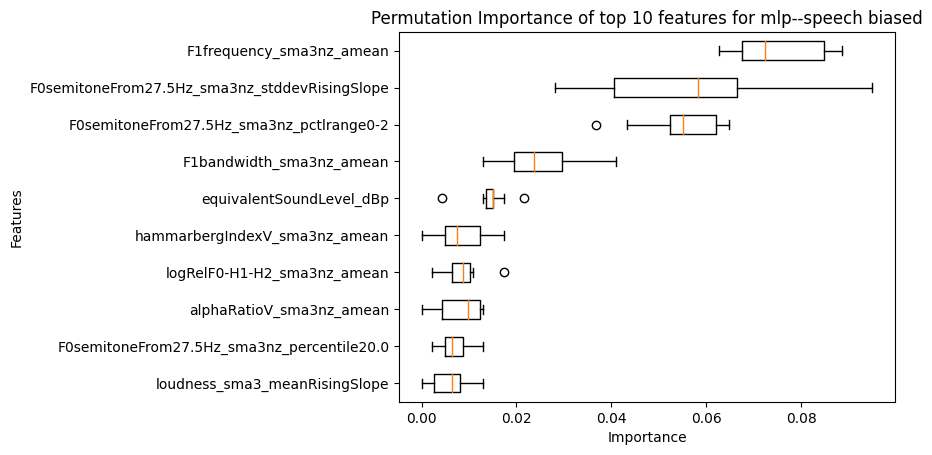

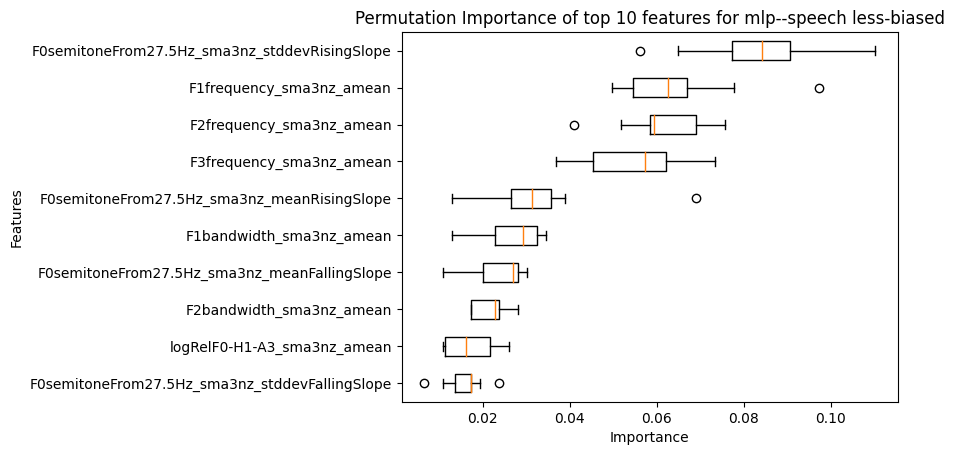

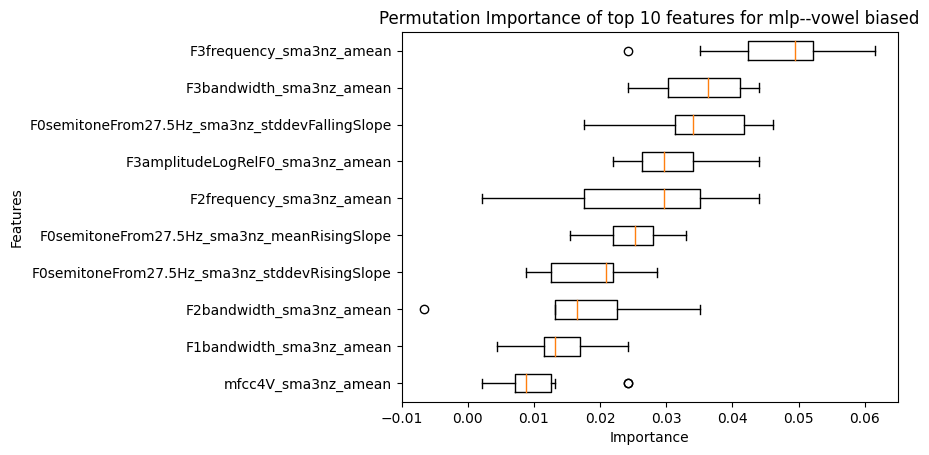

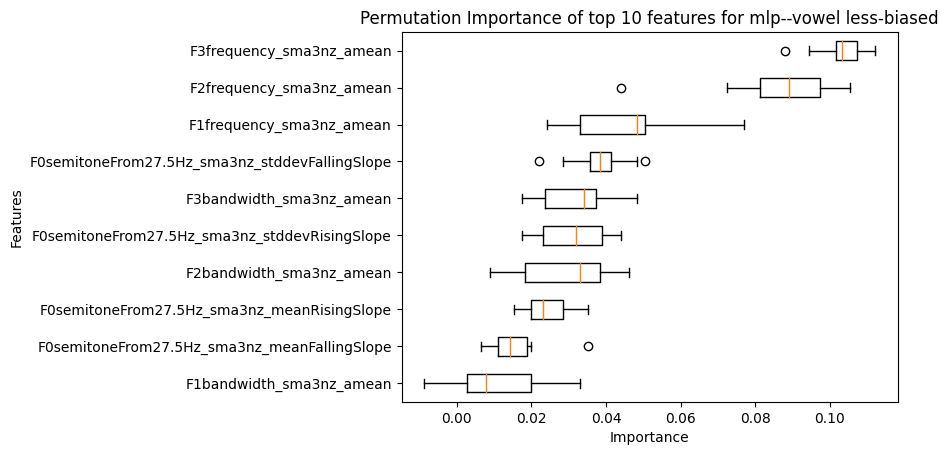

In [ ]:
training_model_name = 'mlp'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        input_file = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned2.pkl'
        with open(input_file, 'rb') as f:
            best_model = pickle.load(f)

        result = permutation_importance(best_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)

        sorted_idx = result.importances_mean.argsort()
        sorted_results = result.importances[sorted_idx]
        sorted_results = sorted_results[-10:]

        fig, ax = plt.subplots()
        ax.boxplot(sorted_results.T,
                  vert=False, labels=np.array(feature_set)[sorted_idx][-10:])
        ax.set_title(f"Permutation Importance of top 10 features for {training_model_name}--{task} {model_name}")
        ax.set_ylabel("Features")
        ax.set_xlabel("Importance")
        plt.show()

# Other features

In [ ]:
cpp_features = ['cpp_amean', 'cpp_stddevNorm', 'cpp_percentile20', 'cpp_percentile80']